In [ ]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:


pd.set_option('mode.chained_assignment', None)

data = pd.read_csv(
    'data8/공공보건의료기관현황.csv',
    index_col=0,
    encoding='CP949',
    engine='python'
)

data.head()


In [10]:
addr = pd.DataFrame(
    data['주소'].apply(lambda v: v.split()[:2]).tolist(),
    columns=['시도', '군구']
)

addr.head()
addr['시도'].unique()


array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [11]:
addr[addr['시도'] == '창원시']

addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']


In [12]:
addr[addr['시도'] == '경산시']

addr.iloc[47] = ['경상북도', '경산시']


In [13]:
addr[addr['시도'] == '천안시']

addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']


In [14]:
addr_aliases = {
    '경기': '경기도',
    '경남': '경상남도',
    '경북': '경상북도',
    '충북': '충청북도',
    '충남': '충청남도',
    '전남': '전라남도',
    '전북': '전북특별자치도',
    '전라북도': '전북특별자치도',
    '서울시': '서울특별시',
    '부산특별시': '부산광역시',
    '대전시': '대전광역시',
    '강원도': '강원특별자치도'
}

addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))
addr['시도'].unique()


array(['강원특별자치도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전북특별자치도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

In [15]:
addr['군구'].unique()

addr[addr['군구'] == '아란13길']
addr.iloc[75] = ['제주특별자치도', '제주시']


In [16]:
addr['시도군구'] = addr.apply(
    lambda r: r['시도'] + ' ' + r['군구'],
    axis=1
)

addr['count'] = 0

addr_group = pd.DataFrame(
    addr.groupby(['시도', '군구', '시도군구'], as_index=False).count()
)

addr_group = addr_group.set_index('시도군구')
addr_group.head()


,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1


In [24]:
import pandas as pd

# 1. 인구 데이터 불러오기
population = pd.read_excel(
    'data8/행정구역_시군구_별__성별_인구수_2.xlsx'
)

# 2. 컬럼명 정리
population = population.rename(columns={
    '행정구역(시군구)별(1)': '시도',
    '행정구역(시군구)별(2)': '군구'
})

# 3. 군구 결측치 제거
population = population[population['군구'].notna()]

# 4. 군구 문자열 공백 제거
for i in range(len(population)):
    if isinstance(population['군구'].iloc[i], str):
        population['군구'].iloc[i] = population['군구'].iloc[i].strip()

# 5. 시도군구 생성
population['시도군구'] = population.apply(
    lambda r: r['시도'] + ' ' + r['군구'],
    axis=1
)


# 6. 합계 / 소계 행 제거
population = population[
    (population['군구'] != '합계') &
    (population['군구'] != '소계')
]

# 7. 인덱스 설정
population = population.set_index('시도군구')

population.head()


C:\Users\it\AppData\Local\Temp\ipykernel_14036\3453540414.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  population['군구'].iloc[i] = population['군구'].iloc[i].strip()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\3453540414.py:20: Futur

,시도,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,139378.0,67240.0,72138.0
서울특별시 중구,서울특별시,중구,121322.0,58651.0,62671.0
서울특별시 용산구,서울특별시,용산구,212175.0,101793.0,110382.0
서울특별시 성동구,서울특별시,성동구,277090.0,134390.0,142700.0
서울특별시 광진구,서울특별시,광진구,335335.0,161154.0,174181.0


In [25]:
addr_population_merge = pd.merge(
    addr_group,
    population,
    how='inner',
    left_index=True,
    right_index=True
)

addr_population_merge.head()


,시도_x,군구_x,count,시도_y,군구_y,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,209174.0,103616.0,105558.0
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,88591.0,45007.0,43584.0
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,62309.0,31645.0,30664.0
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82021.0,40606.0,41415.0
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,20975.0,10994.0,9981.0


In [28]:
local_MC_Population = addr_population_merge[
    ['시도_x', '군구_x', 'count', '총인구수']
]

local_MC_Population = local_MC_Population.rename(columns={
    '시도_x': '시도',
    '군구_x': '군구',
    '총인구수 (명)': '인구수'
})

local_MC_Population['MC_ratio'] = (
    local_MC_Population['count'] /
    local_MC_Population['총인구수'] * 100000
)

local_MC_Population.head()


,시도,군구,count,총인구수,MC_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209174.0,1.912284
강원특별자치도 동해시,강원특별자치도,동해시,1,88591.0,1.128783
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62309.0,1.604905
강원특별자치도 속초시,강원특별자치도,속초시,1,82021.0,1.219200
강원특별자치도 양구군,강원특별자치도,양구군,1,20975.0,4.767580


C:\Users\it\AppData\Local\Temp\ipykernel_14036\2272658982.py:14: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\2272658982.py:14: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\2272658982.py:14: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\2272658982.py:14: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\2272658982.py:14: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\2272658982.py:14: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sa

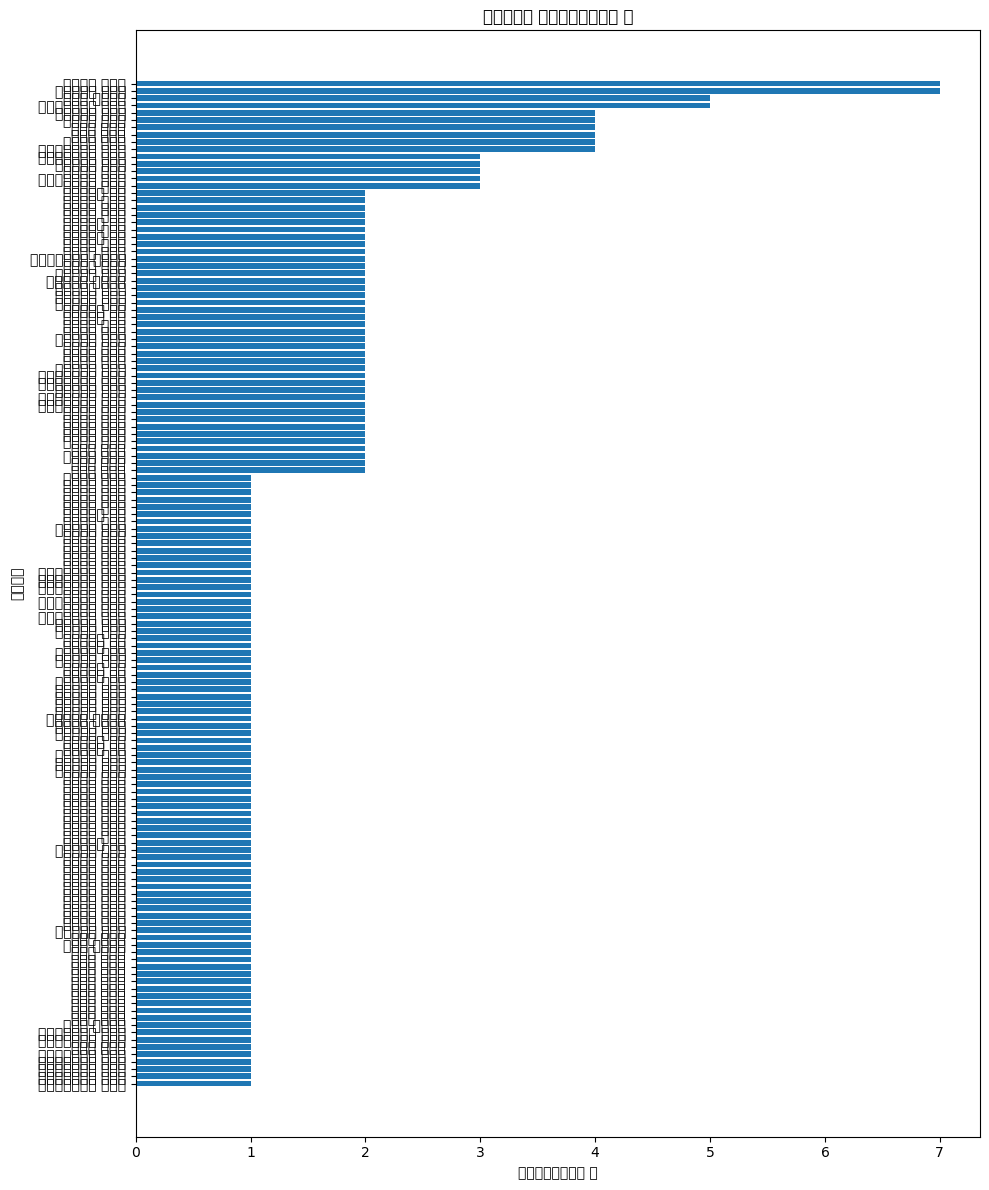

In [29]:
import matplotlib.pyplot as plt

# 의료기관 수 기준 오름차순 정렬
local_MC_Population_sorted = local_MC_Population.sort_values(by='count')

plt.figure(figsize=(10, 12))
plt.barh(
    local_MC_Population_sorted.index,
    local_MC_Population_sorted['count']
)
plt.title('행정구역별 공공보건의료기관 수')
plt.xlabel('공공보건의료기관 수')
plt.ylabel('행정구역')
plt.tight_layout()
plt.show()


C:\Users\it\AppData\Local\Temp\ipykernel_14036\1584739891.py:12: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\1584739891.py:12: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\1584739891.py:12: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\1584739891.py:12: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\1584739891.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\1584739891.py:12: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans

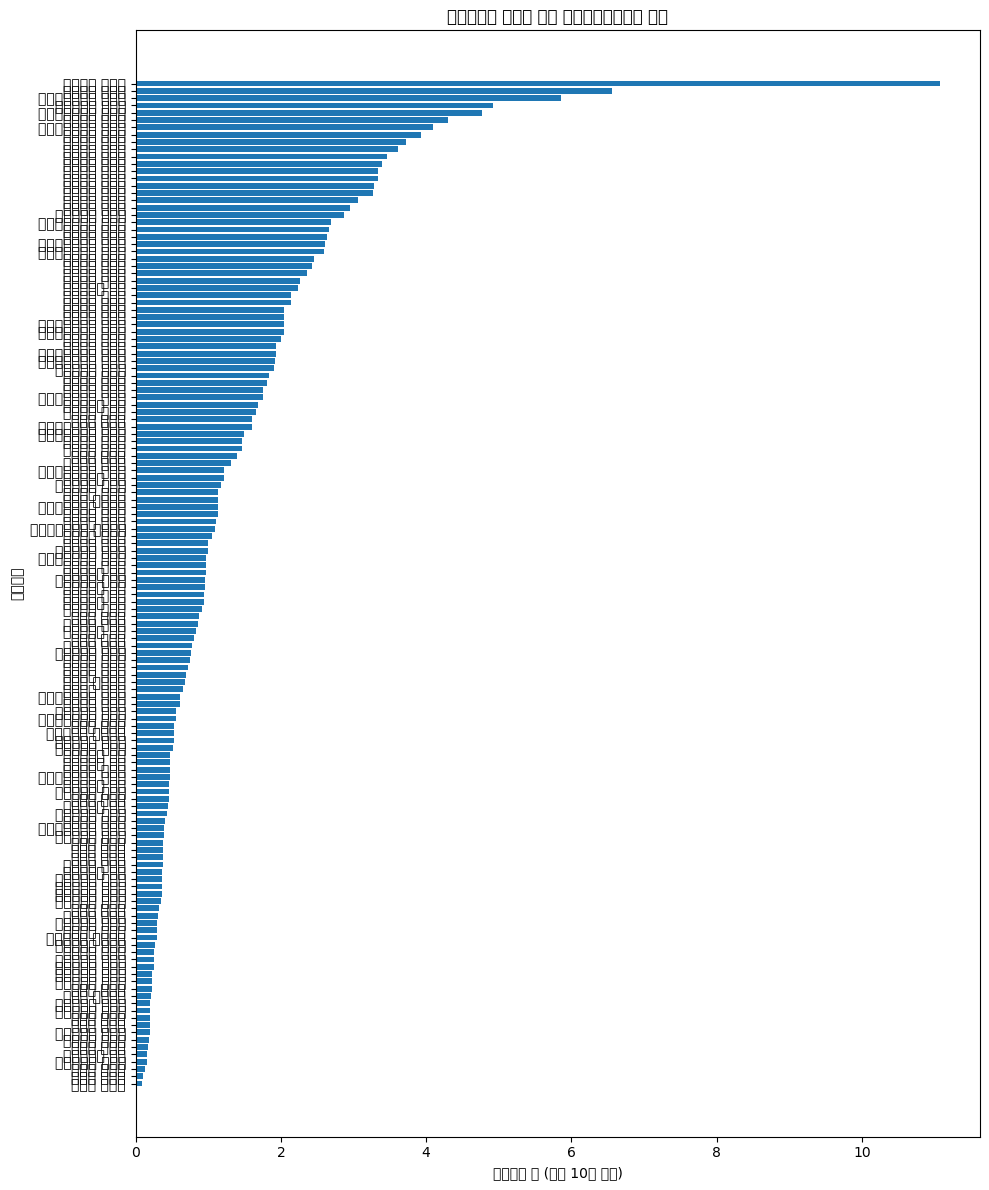

In [30]:
# MC_ratio 기준 오름차순 정렬
local_MC_ratio_sorted = local_MC_Population.sort_values(by='MC_ratio')

plt.figure(figsize=(10, 12))
plt.barh(
    local_MC_ratio_sorted.index,
    local_MC_ratio_sorted['MC_ratio']
)
plt.title('행정구역별 인구수 대비 공공보건의료기관 비율')
plt.xlabel('의료기관 수 (인구 10만 명당)')
plt.ylabel('행정구역')
plt.tight_layout()
plt.show()


In [35]:
import os
import pandas as pd
import numpy as np

path = os.getcwd()
path


'c:\\ihb\\biddata'

In [39]:
data_draw_korea = pd.read_csv(
    r'c:\ihb\biddata\data8\data_draw_korea.csv',
    index_col=0,
    encoding='utf-8'
)


data_draw_korea.head()


,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [40]:
data_draw_korea['광역시도'] = data_draw_korea['광역시도'].replace({
    '강원도': '강원특별자치도',
    '전라북도': '전북특별자치도'
})


In [41]:
data_draw_korea['시도군구'] = (
    data_draw_korea['광역시도'] + ' ' + data_draw_korea['행정구역']
)

data_draw_korea = data_draw_korea.set_index('시도군구')
data_draw_korea.head()


,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시


In [42]:
data_draw_korea_MC_Population_all = pd.merge(
    data_draw_korea,
    local_MC_Population,
    how='left',
    left_index=True,
    right_index=True
)

data_draw_korea_MC_Population_all.head()


,인구수,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,총인구수,MC_ratio
시도군구,,,,,,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,4.0,209174.0,1.912284
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,NaN,NaN,NaN,NaN,NaN
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도,동해시,1.0,88591.0,1.128783
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,1.0,62309.0,1.604905
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,82021.0,1.219200


In [47]:
import matplotlib.pyplot as plt
import numpy as np

BORDER_LINES = [
    [(5,1),(5,2),(5,3),(5,4),(5,5),(4,5),(3,5),(2,5),(1,5),(0,5)],
    [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0)],
    [(9,0),(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)],
    [(9,9),(8,9),(7,9),(6,9),(5,9),(4,9),(3,9),(2,9),(1,9),(0,9)],
    [(0,9),(0,8),(0,7),(0,6),(0,5),(0,4),(0,3),(0,2),(0,1),(0,0)]
]

def draw_blockMap(blockedMap, targetData, title, color):
    whitelabelmin = (max(blockedMap[targetData]) -
                     min(blockedMap[targetData])) * 0.25 + \
                     min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(
        index='y',
        columns='x',
        values=targetData
    )

    masked_mapdata = np.ma.masked_where(
        np.isnan(mapdata),
        mapdata
    )

    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(
        masked_mapdata,
        vmin=vmin,
        vmax=vmax,
        cmap=color,
        edgecolor='#aaaaaa',
        linewidth=0.5
    )

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        anncolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시의 경우 행정구역 명에서 시도명 이름 제거
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(
                row['광역시도'][:-1],
                row['행정구역'][:-1]
            )
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서울·세종·제주처럼 이름이 3자 이상이면 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(
            dispname,
            (row['x'] + 0.5, row['y'] + 0.5),
            weight='bold',
            fontsize=fontsize,
            ha='center',
            va='center',
            color=anncolor,
            linespacing=linespacing
        )

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    plt.gca().set_aspect(1)
    plt.axis('off')

    cb = plt.colorbar(shrink=1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.savefig('./19_data/' + 'blockMap_' + targetData + '.png')
    plt.show()


C:\Users\it\AppData\Local\Temp\ipykernel_14036\3817164677.py:88: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\3817164677.py:88: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\3817164677.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\3817164677.py:88: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\3817164677.py:88: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\it\AppData\Local\Temp\ipykernel_14036\3817164677.py:88: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) D

FileNotFoundError: [Errno 2] No such file or directory: './19_data/blockMap_count.png'

c:\Users\it\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE

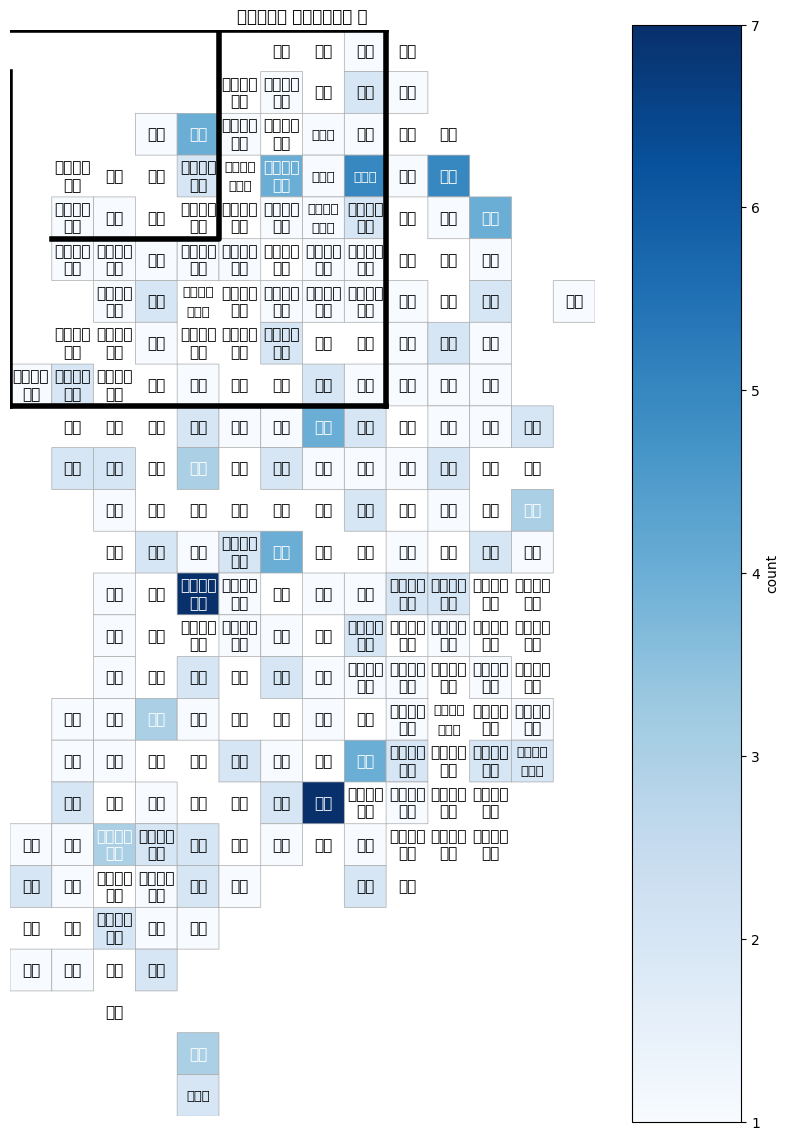

In [48]:
draw_blockMap(
    data_draw_korea_MC_Population_all,
    'count',
    '행정구역별 공공의료기관 수',
    'Blues'
)
